# Creation of Intelligent Regression based data model to predict house / home prices on basis of sales data in Seattle region from 2014 to 2015. Data models take into account various features like area, location, amenities and condition

#### Import of all libraries

In [1]:

# all the basic libraries that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
sns.colorcodes = True
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import copy


# pre-processing method
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
# the regression models 
from sklearn.linear_model import LinearRegression

#LazyPredict Library 
from lazypredict.Supervised import LazyRegressor

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline


#Mapping Library
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

#Pickling
import pickle


#### Loading Dataset

In [2]:
#Using pandas method to read csv file into a dataframe
houseDataSet = pd.read_csv('innercity.csv')

In [3]:
#View first 10 rows of the dataset
houseDataSet.head(10)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.00,0,0,...,0,1956,0,98133,47.72,-122.34,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.00,0,0,...,800,1976,0,98023,47.32,-122.39,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.00,0,0,...,0,2006,0,98038,47.35,-122.00,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.00,0,0,...,0,1916,0,98133,47.70,-122.35,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.00,0,0,...,0,1954,0,98115,47.68,-122.27,1900,5940,0,5450
5,5525400430,20140715T000000,585000,3,2.50,2050,11690,2.00,0,0,...,0,1989,0,98059,47.53,-122.16,2410,10172,1,13740
6,2419600075,20141201T000000,465000,3,1.75,1480,6360,1.00,0,0,...,0,1954,0,98133,47.73,-122.35,1480,6360,0,7840
7,114101161,20140829T000000,480000,3,1.50,2100,67269,1.00,0,0,...,880,1949,0,98028,47.76,-122.23,1610,15999,0,69369
8,7011201550,20140707T000000,780000,4,2.00,2600,4800,1.00,0,2,...,1200,1953,0,98119,47.64,-122.37,2050,3505,0,7400
9,7203000640,20140918T000000,215000,4,1.00,1130,7400,1.00,0,0,...,0,1969,0,98003,47.34,-122.32,1540,7379,0,8530


#### Descriptive Information on Data Parameters
    1.cid : represents a unique ID for the house
    2.dayhours: represents when the date when the house was sold
    3.price : Selling price of the house when it was sold. This will be our target variable
    4.room_bed, room_bath : Represents number of bedrooms and bathoorms in the house respectively
    5.living_measure: represents square footage of the home, 
    6.lot_measure: represents square footage of the lot
    7.total_area: Would be the sum total of lot_measure and living_measure, hence total_area = living_measure + lot_measure
    8.living_measure15 , lot_measure15 : represents area in 2015 i.e. living room area and lot size area. 
    9.ceil: Total floors or levels in the house
    10.coast: Is a boolean variable representing wether the house has a water front or not.
    11.sight: Is another boolean variable representing wether the house has been viewed by clients or not.
    12.ceil_measure: Square footage of the house except the basement.
    13.condition: Overall condition of the house a number.
    14.Quality: Grade given to housing unit based on grading system
    15.yr_built: Year when this house was built, it basically represents the age of house.
    16.yr_renovated: Year when the house got renovated. We assume that the last renovation year is captured in the data set
    17.zipcode: simple zipcode.
    18.lat, long: Co-ordinates of the house.

## Exploratory Data Analysis (Begin)

In [4]:
#See Dataframe shape and Size 
print("Shape :",houseDataSet.shape)
print("Size (in Bytes) :",houseDataSet.size)

Shape : (21613, 23)
Size (in Bytes) : 497099


In [5]:
#Print out the datatypes for various parameters here
houseDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

#### Here from the above output we see that, "dayhours" is of type "object", rest all parameters are numbers of type either int64 or fractions float64. Also we see that there are no null values as Non-Null count is 21613 which is same as number of rows of the dataset

#### Here there are 22 Independent variables in the data set and 1 target variable i.e. price

In [6]:
#Summarization of the data or calcuating the 5 point summary i.e. the Min, 25th , 50th (Median), 75th Percentiles, Max value
houseDataSet.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cid,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540182.16,367362.23,75000.00,321950.00,450000.00,645000.00,7700000.00
room_bed,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
room_bath,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
living_measure,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
lot_measure,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
ceil,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
coast,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
sight,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


### Observations of 5 Point Summary

    1.Looking through the distribution of features coast, sight, basement, yr_renovated and furnished it is left skewed. It is clearly evident from the above summary that the values for minimum, 25 percentile, 50 percentile and 75 percentile is 0. This is also referred as negative skewness in data.

    2.Some of the attributes seems like normally distributed since the mean values are most probably equal to median values: room_bed, room_bath, ceil, condition, yr_built, zipcode, lat and lang


In [7]:
#Function Definition 
def calculate_building_age(yr_built, yr_renovated):
    if yr_renovated is not None and yr_renovated != 0:
        return datetime.now().year - yr_renovated
    else:
        return datetime.now().year - yr_built

In [8]:
#Creating new column building_age based on yr_built / yr_renovated. 
houseDataSet["building_age"] = houseDataSet.apply(lambda row : 
                                                  calculate_building_age(row['yr_built'], row['yr_renovated']),axis=1)
houseDataSet["building_age"].describe()

count   21613.00
mean       48.61
std        28.81
min         7.00
25%        23.00
50%        45.00
75%        68.00
max       122.00
Name: building_age, dtype: float64

#### From the above, description on building age it evident that in our data set oldest building being 121 years old , and newest buildings is just 6 years old from current year. Hence this gives us an insight that the data set is atleast 6 years old 

In [9]:
#Data Correlation
houseDataSet.corr()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,building_age
cid,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,...,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14,-0.01,-0.13,-0.02
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,...,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,0.57,0.10,-0.11
room_bed,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,...,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03,0.26,0.04,-0.17
room_bath,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,...,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,0.48,0.10,-0.54
living_measure,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,...,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,0.63,0.19,-0.34
lot_measure,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,...,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,0.12,1.00,-0.05
ceil,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,...,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,0.35,0.00,-0.51
coast,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,...,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.07,0.02,0.00
sight,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,...,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,0.22,0.08,0.02
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,...,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,-0.12,-0.01,0.40


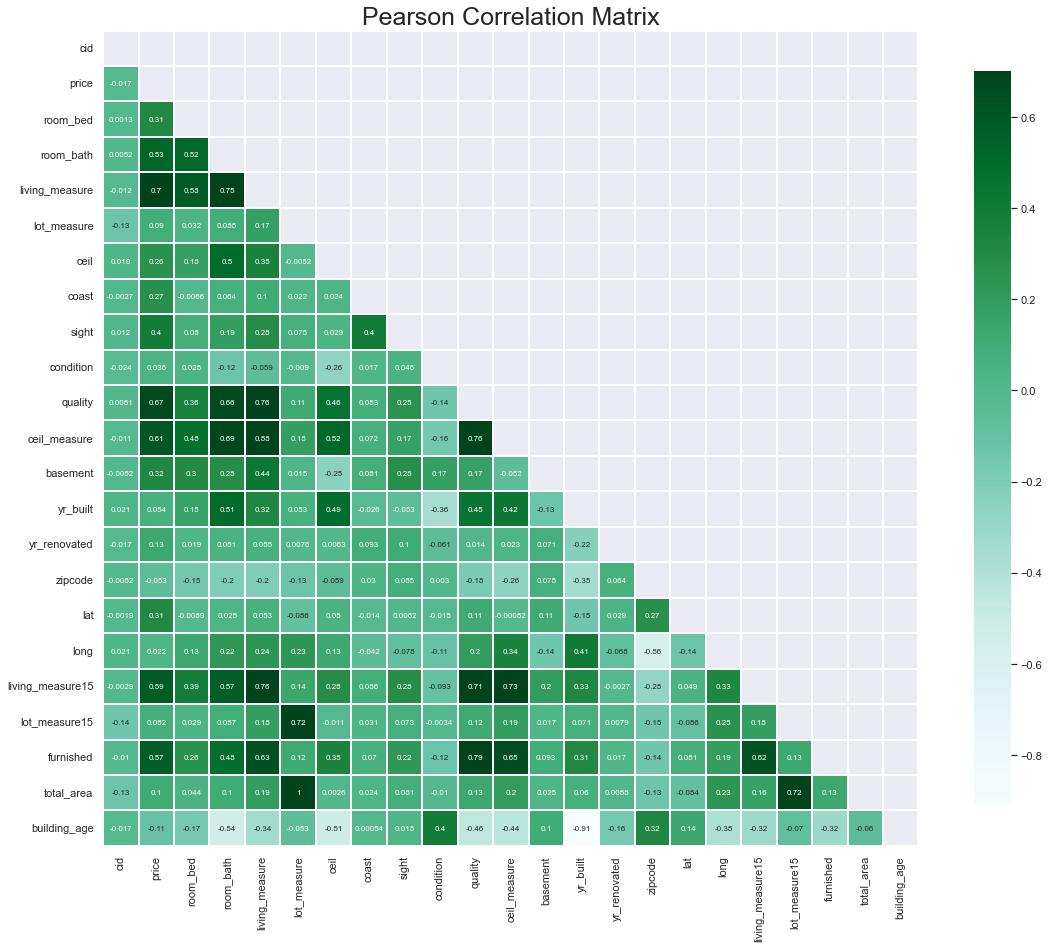

In [10]:
#Plotting heatmap for correlation
f, ax = plt.subplots(figsize=(20, 15))
plt.title('Pearson Correlation Matrix',fontsize=25)

mask = np.zeros_like(houseDataSet.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
#Generating heatmap here
sns.heatmap(houseDataSet.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

#### Decission to drop parameters from the data set such that our prediction model does not miss out on information, based on above correlation and heatmap. Here, we can select to drop all parameters with a correlation less than 0.25 with target variable 'price' 
##### "cid": 
Since this is a unique representation on house and it will not have any implication on the model. Correlation is negative
##### "dayhours": 
It represents the date house was sold, which really does not help in house price prediction also, data is in string form cannot be used in computation.
##### "zipcode": 
Looking into the data and searching the zip-code we have seen that it specifically belongs to a particular area and hence we can drop this parameter too.
##### "lot_measure" and 'lot_measure15'
Weak correlation when it comes to predict the price of the house. We can say that customers do not care on the lot_measure compare to living measure
##### "lat" and "long": 
Since they represent a 3D view of the house and buyers do not really care about the lattitude and longitude degree of the house. This would reduce the compute power needs
##### 'condition': 
Very weak correlation with price
##### 'yr_built' and 'yr_renovated': 
Both have very weak correlation when it comes to predicting price of the house
##### 'total_area'
Since it sums up both living_measure and lot_measure and since lot_measure is the bigger value and does not have a strong co-relation therefore , total_area itself has a week correlation
##### 'building_age'
We calculated building age but it seems to have a weak correlation with price too, given that yr_built and yr_renovated both have a  weak correlation. 

In [11]:
#Dropping columns and creating new dataframe
newHouseDf = houseDataSet.drop(columns=['cid', 'dayhours', 'zipcode', 'lot_measure', 'lat', 'long', 'yr_built', 'yr_renovated',
                                       'total_area', 'lot_measure15', 'condition', 'building_age'], axis=1)
newHouseDf.head(2)

,price,room_bed,room_bath,living_measure,ceil,coast,sight,quality,ceil_measure,basement,living_measure15,furnished
0,808100,4,3.25,3020,1.00,0,0,9,3020,0,2120,1
1,277500,4,2.50,2550,1.00,0,0,8,1750,800,2260,0


In [12]:
#Data Shape after dropping 11 columnsn
newHouseDf.shape

(21613, 12)

#### Histogram Plot (Univariate Analysis)

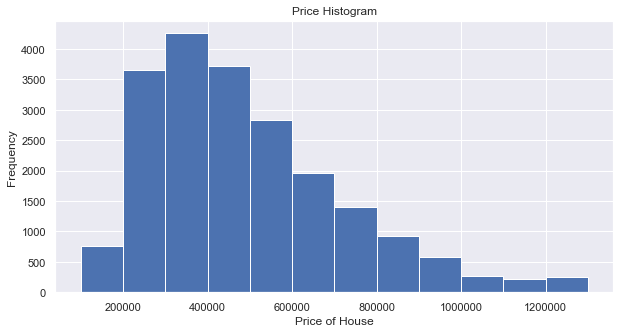

In [13]:
plt.figure(figsize = (10,5))
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]) * 1000
plt.hist(x=houseDataSet['price'], bins=bins)
plt.xlabel('Price of House')
plt.ticklabel_format(style='plain')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

#### Analysis of the above Histogram plot. 

1. House price between 300K to 400K have the highest frequency i.e. most of the houses are priced between this range.
2. House price distribution seems to be Right skewed, and does not follow a normal distribution

#### Regression Plots (BiVariate Analysis)

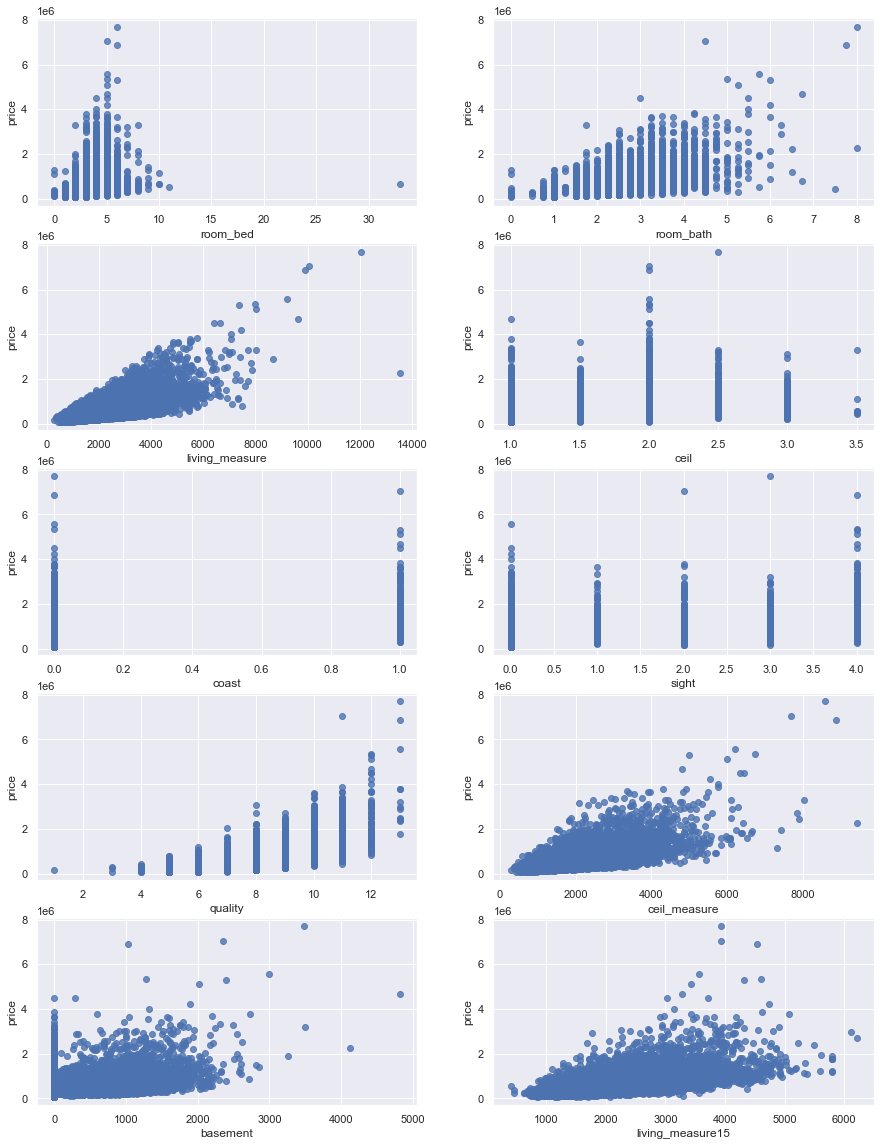

In [343]:
#Bivariate analysis to gain data insights here, using regplot
f,axes = plt.subplots(5, 2,figsize=(15,20))
sns.regplot(x='room_bed', y='price', data=newHouseDf,  ax=axes[0][0],fit_reg=False)
sns.regplot(x='room_bath', y='price', data=newHouseDf,  ax=axes[0][1], fit_reg=False)
sns.regplot(x='living_measure', y='price', data=newHouseDf,  ax=axes[1][0],fit_reg=False)
sns.regplot(x='ceil', y='price', data=newHouseDf,  ax=axes[1][1], fit_reg=False)
sns.regplot(x='coast', y='price', data=newHouseDf,  ax=axes[2][0],fit_reg=False)
sns.regplot(x='sight', y='price', data=newHouseDf,  ax=axes[2][1], fit_reg=False)
sns.regplot(x='quality', y='price', data=newHouseDf,  ax=axes[3][0],fit_reg=False)
sns.regplot(x='ceil_measure', y='price', data=newHouseDf,  ax=axes[3][1], fit_reg=False)
sns.regplot(x='basement', y='price', data=newHouseDf,  ax=axes[4][0],fit_reg=False)
sns.regplot(x='living_measure15', y='price', data=newHouseDf,  ax=axes[4][1], fit_reg=False)

plt.show()

#### Analysis Regression Plots

1. Price vs coast, price vs sight and price vs ceil do not seem to have any linear relationship either positive or negative.
2. Price vs living measure, Price vs ceil_measure, seems to have a positive linear relationshop with outliers present. 

#### BoxPlots for Outlier detection
Standardized way of displaying the distribution of data based on 5 point summary 

<AxesSubplot:xlabel='furnished', ylabel='price'>

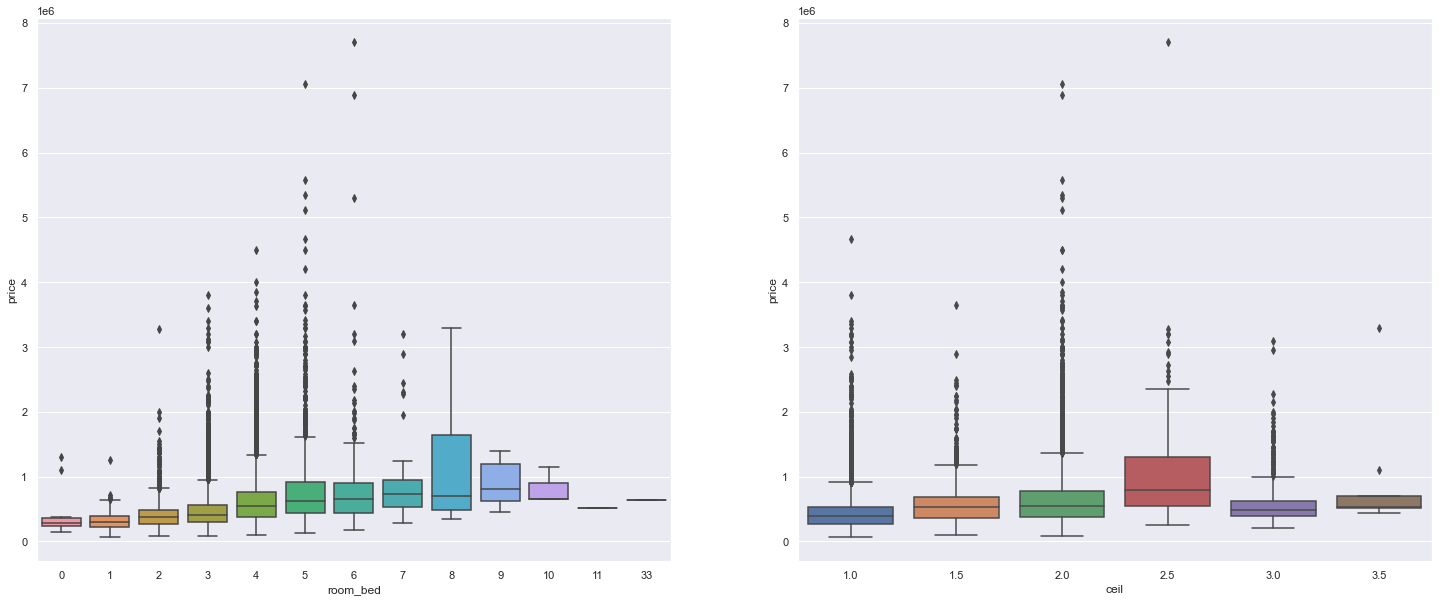

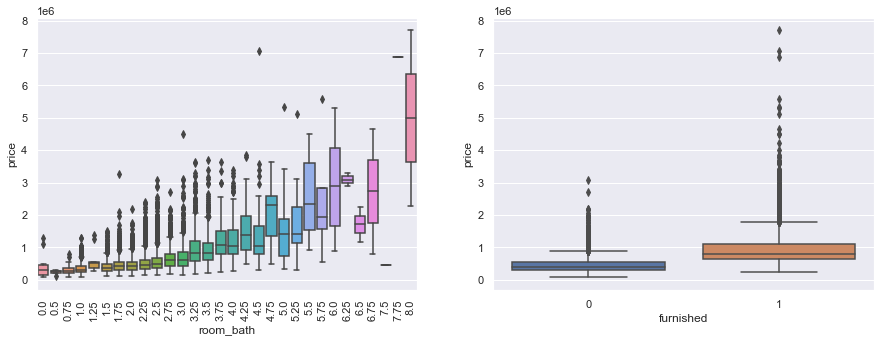

In [344]:
# Box Plot pair for number of bedrooms vs price and ceil vs price
f, axes = plt.subplots(1, 2,figsize=(25,10))
sns.boxplot(x=newHouseDf['room_bed'],y=newHouseDf['price'], ax=axes[0])
sns.boxplot(x=newHouseDf['ceil'],y=newHouseDf['price'], ax=axes[1])

#Another box plot pair for number of bathrooms vs price and is house furnished or not vs price
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=newHouseDf['room_bath'],y=newHouseDf['price'], ax=axes[0])
labels = axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
sns.boxplot(x=newHouseDf['furnished'],y=newHouseDf['price'], ax=axes[1])


#### From the above box plots we can see that many data points are in category of outliers falling above (Q3 + 1.5*IQR). Having to many outliers is not good for prediction model which eventually decreases the accuracy and increase error

#### Processing outliers

In [345]:
#Checking value counts for number of bedrooms
houseDataSet['room_bed'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

In [346]:
houseDataSet[houseDataSet['room_bed']  == 33]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,building_age
750,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.00,0,0,...,1947,0,98103,47.69,-122.33,1330,4700,0,7620,75


The living_measure and lot_measure are 1620 & 6000, no.of Bath is 1.75 while the number of bed is 33. This definitely looks like a erroeneous record. Dropping this record.

In [347]:
houseDataSet.drop(houseDataSet[houseDataSet['room_bed'] == 33].index, inplace=True)

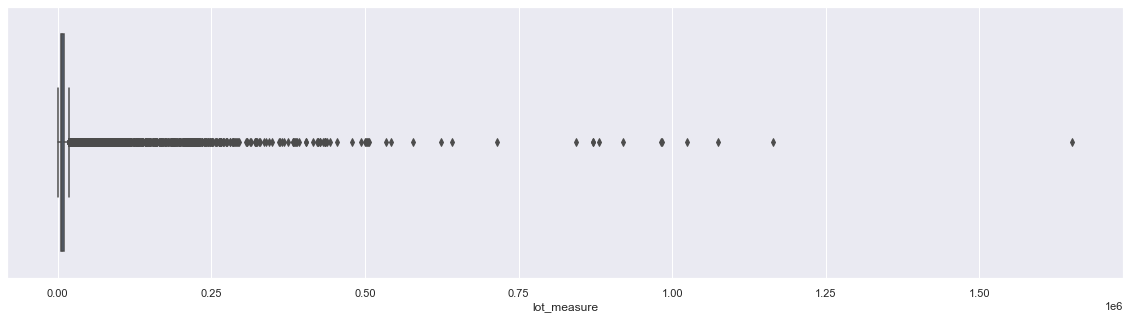

In [348]:
plt.figure(figsize=(20, 5))
sns.boxplot(houseDataSet['lot_measure'])
plt.show()

In [349]:
rows, cols = houseDataSet.drop(houseDataSet[houseDataSet['lot_measure']>435600].index).shape
original_row, _ = houseDataSet.shape
print(f"Removing outliers with lot_measure >435600 or more than 10 acres, we removed :{original_row - rows} entries")

Removing outliers with lot_measure >435600 or more than 10 acres, we removed :27 entries


In [350]:
houseDataSet.drop(houseDataSet[houseDataSet['lot_measure'] > 435600].index, inplace=True)

#### Mapping the zipcodes in the data set on a real map 

In [14]:
def get_center_coordinates(df):
    # get the central coordinates for the map
    centerlat = df['lat'].mean()
    centerlong = df['long'].mean()
    return centerlat, centerlong

In [15]:
#Generating map without any house plots 
center = get_center_coordinates(houseDataSet)
map = folium.Map(location=center, zoom_start=10)
map

In [16]:
#Generate Map with House Lat and long coordinates
houseMap = folium.Map(location=center, zoom_start=10)
for index in range(len(houseDataSet)):
    # To speed up this algorithm, we are plotting every 20th house in the data set
    if index % 20 == 0:
        folium.Circle(
            location=[houseDataSet.iloc[index]['lat'], houseDataSet.iloc[index]['long']],
            radius=2,color='black', opacity=0.6, popup='Seattle, OR'
        ).add_to(houseMap)
#Display map
houseMap

### End of EDA 

### Baseline Model

In [17]:
def print_shapes(x_train, x_test, y_train, y_test):
    print(f'Shape of X Train Data Set :{x_train.shape}')
    print(f'Shape of X Test Data Set :{x_test.shape}')
    print(f'Shape of Y Train Data Set: {y_train.shape}')
    print(f'Shape of Y Test Data Set: {y_test.shape}')

In [18]:
#Separate Target or dependent variable from rest of the data set.
def initialize_model_data(dataset, target_col=None, needToScale=False):
    if target_col is None:
        raise ValueError('target_col cannot be none or empty')
    X_data = dataset.drop(columns=[target_col], axis=1)
    Y_data = dataset[[target_col]]
    return X_data, Y_data

In [19]:
#Splitting of Data in Training and Testing sets.
#30% of the original data would be our test sample size

def linear_regression_model_score(dataset, target_col, needToScale=False):
    X_data, Y_data = initialize_model_data(dataset, target_col, needToScale)
    if needToScale: 
        std_scaled = StandardScaler()
        X_data = pd.DataFrame(std_scaled.fit_transform(X_data), columns=dataset.columns.tolist().remove(target_col))
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=42)
    #print_shapes(X_train, X_test, Y_train, Y_test)
    lr_model = LinearRegression()
    lr_model.fit(X_train, Y_train)
    print(f'Score of Regression Model for Training Data : {lr_model.score(X_train, Y_train)}')
    print(f'Score of Regression Model for Testing Data : {lr_model.score(X_test, Y_test)}')  
    

### Using LazyPredict Library to run across multiple regression models with LazyRegressor 

In [20]:
# Using lazy Regressor here to run across all regressor models for the given dataset
def run_lazy_regressor(dataset, target_col, needToScale=False):
    X_data = dataset.drop(columns=['price'], axis=1)
    Y_data = dataset['price']
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=42)
    reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
    models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)
    print(models)

In [21]:
# Regression Model score on the orginal data without any drop in columns (except cid) and without any scaling
linear_regression_model_score(houseDataSet.drop(columns=['cid', 'dayhours']), 'price')


Score of Regression Model for Training Data : 0.6995747496609832
Score of Regression Model for Testing Data : 0.7014935694650515


In [23]:
# Linear regression Model by dropping columns does not really increase the accuracy
linear_regression_model_score(newHouseDf,'price')

Score of Regression Model for Training Data : 0.594434373105281
Score of Regression Model for Testing Data : 0.6031238080534282


#### From the above we see that , Regression model scores more on orginal dataset with only columns "cid" and "dayhours" dropped than the new data set which drops columns whose correlation score with price is less than 0.25

In [24]:
#Running Regression Score with Scaled data
linear_regression_model_score(houseDataSet.drop(columns=['cid', 'dayhours']), 'price', True)

Score of Regression Model for Training Data : 0.6995771803895149
Score of Regression Model for Testing Data : 0.7014802643915836


In [25]:
linear_regression_model_score(newHouseDf,'price',True)

Score of Regression Model for Training Data : 0.5945539261174065
Score of Regression Model for Testing Data : 0.6029699159690668


### Applying standard scaler to process outliers , did not bring in much improvement in regression score for the linear model. Also dropping columns did not help either in imporving regression score accuracy. 

In [362]:
run_lazy_regressor(houseDataSet.drop(columns=['cid', 'dayhours'],axis=1), 'price')

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:03<00:00,  4.37s/it]


                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
XGBRegressor                                 0.89       0.89  122095.24   
LGBMRegressor                                0.87       0.87  128104.50   
RandomForestRegressor                        0.87       0.87  129712.65   
HistGradientBoostingRegressor                0.87       0.87  131233.20   
GradientBoostingRegressor                    0.86       0.86  133349.21   
ExtraTreesRegressor                          0.86       0.86  133513.82   
BaggingRegressor                             0.86       0.86  136409.16   
KNeighborsRegressor                          0.79       0.79  166592.08   
PoissonRegressor                             0.77       0.77  173005.17   
DecisionTreeRegressor                        0.72       0.73  189168.19   
ExtraTreeRegressor                           0.72       0.72  191608.90   
LassoLarsIC              

### From the above, we observe, that Model = "XGBRegressor" has the best accuracy and also takes about 1.92 seconds to run. The R^2 value is 0.89 which means 89% of goodness of fit of the model for the data

### Our baseline model stands out to be XGBRegressor

#### The reason why XGBRegressor has a better accuracy score prediction over Linear regression algorithm is because it perform Gradient Boasting which can be used for both regression and classification problems. In case of regression, when the target variable is continous variable the gradient boosting technique makes use of Mean Square Error (MSE) , idea is to minimize the MSE value across number of iterations thus decreasing the Bias Error.

## Hyper Parameter Tuning, GridSearchCV and RandomSearchCV

In [38]:
# Using run_Grid_Search_CV Regressor here to run across all regressor models for the given dataset
def run_Grid_Search_CV(dataset, target_col, needToScale=False):

    X_Data = dataset.drop(columns=['price'],axis=1)
    X_Data=X_Data.apply(zscore)
    Y_Data = dataset[target_col]  
    X_train, X_test, Y_train, Y_test=train_test_split(X_Data,Y_Data,test_size=0.30,random_state=42)
    
    # Hyperparameters tuning dictonary which will be evaluated accross multiple validations by Grid search CV algorithm
    # The below hyperparameters are for algorith XGBoost which is used in XGBRegressor 
    # (https://xgboost.readthedocs.io/en/stable/parameter.html)
    param_grid = {
        'gamma' : np.arange(0,1000,300),  # Range can go upto infinity but keeping stop value to 1000
        'max_depth': np.arange(1, 6, 2),  # Between 0 - 6
        'subsample': [0,1],
        'sampling_method' : ['uniform', 'gradient_based']} 
    
    # Initialize Grid Search CV model here. Cross validation by default will be = 3
    grid_search_cv_for_xgb = GridSearchCV(XGBRegressor() , param_grid = param_grid, cv = None)
    models=grid_search_cv_for_xgb.fit(X_train, Y_train)
    y_pred = np.around(grid_search_cv_for_xgb.predict(X_test))

    print({
    'model': 'XGBRegressor',
    'Y Predictions': y_pred,
    "Best accuracy":"{:.0%}".format(grid_search_cv_for_xgb.best_score_),
    'Best Params': grid_search_cv_for_xgb.best_params_,
    'Test set accuracy': "{:.0%}".format(grid_search_cv_for_xgb.score(X_test,Y_test))
})

In [45]:
def run_Random_Search_CV(dataset, target_col, needToScale=False):

    X_Data = dataset.drop(columns=['price'],axis=1)
    X_Data=X_Data.apply(zscore)
    Y_Data = dataset[target_col]
    X_train, X_test, Y_train, Y_test=train_test_split(X_Data,Y_Data,test_size=0.30,random_state=42)
    param_dist = {}
    randomsearch=RandomizedSearchCV(XGBRegressor(), param_distributions = param_dist, cv=9, n_iter = 90)
    rnd_model=randomsearch.fit(X_train, Y_train)
    print('best score of Randomized Search :',"Best accuracy:{:.0%}".format(randomsearch.best_score_))
    print('best params of Randomized Search:', randomsearch.best_params_)
    print('best score of Randomized Search :', randomsearch.score(X_test,Y_test))

In [39]:
run_Grid_Search_CV(houseDataSet.drop(columns=['cid', 'dayhours'],axis=1), 'price')

{'model': 'XGBRegressor', 'Y Predictions': array([365495., 767014., 982501., ..., 240596., 223385., 447881.],
      dtype=float32), 'Best accuracy': '87%', 'Best Params': {'gamma': 0, 'max_depth': 5, 'sampling_method': 'uniform', 'subsample': 1}, 'Test set accuracy': '88%'}


#### From the above we see that , Accuracy score with Grid Search CV given the hyper parameter tuning set is at 88% which tells us that hyper parameter tunning did not help us further on the accuracy score than with default parameter setting of XGBRegressor model

In [46]:
run_Random_Search_CV(houseDataSet.drop(columns=['cid', 'dayhours'],axis=1), 'price')

best score of Randomized Search : Best accuracy:88%
best params of Randomized Search: {}
best score of Randomized Search : 0.8879358000776519


#### Output of Random Search CV is not much different from that of Grid Search CV. Although the execution time of RandomSearch CV with random search space is quicker compared to Grid Search CV

## Pipeline with and Without Principal component analysis

In [49]:
def run_model_pipeline(dataset, target_col, isPCA=False):
    X_Data = dataset.drop(columns=[target_col],axis=1)
    X_Data=X_Data.apply(zscore)
    Y_Data = dataset[target_col]
    # Train and Test Data Split.
    X_train, X_test, Y_train, Y_test=train_test_split(X_Data,Y_Data,test_size=0.30,random_state=42)
    
    # Initialize Principal component analysis here. 
    pca = PCA(n_components=17)
    pca.fit(X_train)
    scaler = MinMaxScaler().fit(X_train)
    pipe = None
    #Creating a Pipeline here with MinMaxScaler --> PCA() --> Model (XGB Regressor)
    if isPCA:
        pipe = Pipeline([(" scaler", MinMaxScaler()), ('pca', PCA()), (" xgb", XGBRegressor())])
    else:
        pipe = Pipeline([(" scaler", MinMaxScaler()), (" xgb", XGBRegressor())])
        
    #Training the Pipeline here
    pipe.fit( X_train, Y_train)
    if isPCA:
        print("Pipeline (with PCA) Test score: {:.2f}". format( pipe.score( X_test, Y_test)))
    else:
        print("Pipeline (without PCA) Test score: {:.2f}". format( pipe.score( X_test, Y_test)))

In [50]:
run_model_pipeline(houseDataSet.drop(columns=['cid', 'dayhours'],axis=1),'price', isPCA=True)

Pipeline (with PCA) Test score: 0.78


In [51]:
run_model_pipeline(houseDataSet.drop(columns=['cid', 'dayhours'],axis=1),'price', isPCA=False)

Pipeline (without PCA) Test score: 0.89


#### From the above we see that, our pipeline performs better without the application of principal component analysis.

##### Score with PCA , falls down to = 78%
##### Score without PCA, is the score that our model gives  = 89%



### Model Pickling, XGB Regressor is our best model / linear regressor algorithm


In [26]:
# Using XGB Regressor Model with Dataset 
regression_model = XGBRegressor()
X_data, Y_data = initialize_model_data(houseDataSet.drop(columns=['cid', 'dayhours'],axis=1), 'price')
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=42)
regression_model.fit(X_train, Y_train)
print(f'Score of XGB Regressor Model for Training Data : {regression_model.score(X_train, Y_train)}')
print(f'Score of XGB Regressor Model for Testing Data : {regression_model.score(X_test, Y_test)}') 

Score of XGB Regressor Model for Training Data : 0.9777466056379783
Score of XGB Regressor Model for Testing Data : 0.8878310166058194


In [27]:
# Defining constants

PICKLE_MODEL_FILE_NAME="xbgRegressor_model.pickle"
PICKLE_MODEL_INSTANCE=regression_model

In [28]:
# Writing or creating Pickle file here

with open(PICKLE_MODEL_FILE_NAME, 'wb') as model_pickle_file:
  pickle.dump(PICKLE_MODEL_INSTANCE, model_pickle_file)

print('Model Pickled successfully')

Model Pickled successfully


### Reading Pickle file to run predictions

In [30]:
test_model = pickle.load(open(PICKLE_MODEL_FILE_NAME, 'rb'))
print(test_model)
print(f'Accuracy score of model prediction data  : {test_model.score(X_test, Y_test)}') 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy score of model prediction data  : 0.8878310166058194


#### From the above we see that the prediction score of the pickled model is same as that of the previous in memory model. Hence we can train models and pickle them and then when required read from the pickle files and apply on testing data

# End of Code